In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn import cluster as ct
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Carregamento dos dados
X = pd.read_csv( 'X_dataset.csv' )

In [3]:
# Medindo a performance utilizando o valor padrão de clusters do algoritmo
kmeans = ct.KMeans( random_state=0 )
labels = kmeans.fit_predict( X )

ss_avg = mt.silhouette_score( X, labels )
round(ss_avg.item(), 3)

0.163

In [4]:
# Utilizando o Elbow Method para descobrir o melhor parâmetro de n_clusters
df_scores_params = pd.DataFrame(columns=['n_clusters', 'SS'])

clusters = np.arange( 2, 11, 1 )

for c in clusters:
    kmeans = ct.KMeans( n_clusters=c, random_state=0 )
    labels = kmeans.fit_predict( X )
    ss = mt.silhouette_score( X, labels )
    
    df_scores_params = df_scores_params._append({'n_clusters': c, 'SS': ss }, ignore_index=True)   


C:\Users\gabri\AppData\Local\Temp\ipykernel_18868\1345870997.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores_params = df_scores_params._append({'n_clusters': c, 'SS': ss }, ignore_index=True)


Text(0, 0.5, 'Avergage Silhouette Score')

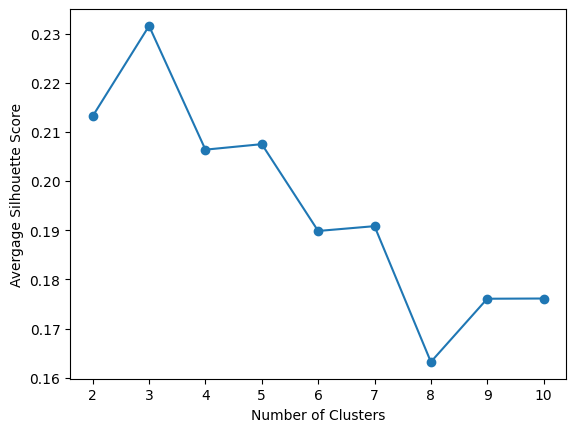

In [5]:
# Exibindo o gráfico com os valores de n_clusters e sua performance correpondente encontrada
clusters = df_scores_params['n_clusters']
ss_list = df_scores_params['SS']

plt.plot( clusters, ss_list, marker='o' )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Avergage Silhouette Score' )


In [6]:
#Exibindo o melhor resultado de n_clusters encontrado

max_index = df_scores_params['SS'].idxmax()
best_value = round(df_scores_params.loc[max_index, 'SS'], 3)
best_n_clusters = int(df_scores_params.loc[max_index, 'n_clusters'])

print(f"Melhor Resultado: {best_value}, utlizando {best_n_clusters} clusters")

Melhor Resultado: 0.232, utlizando 3 clusters
